In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
import mne

%matplotlib inline
plt.rcParams["figure.figsize"] = (20,12)

In [2]:
eeg_file_path = 'Data/10024/EEG_10024/'
mat_file_path = 'Data/10024/190227_10024.mat'

In [3]:
mat = sio.loadmat(mat_file_path)
eeg = mne.io.read_raw_brainvision(eeg_file_path+'10024.vhdr') 

Extracting parameters from Data/10024/EEG_10024/10024.vhdr...
Setting channel info structure...


<ipython-input-3-26d948b7258d>:2: DeprecationWarning: stim_channel (default True in 0.17) will change to False in 0.18 and be removed in 0.19, set it to False in 0.17 to avoid this warning
  eeg = mne.io.read_raw_brainvision(eeg_file_path+'10024.vhdr')
<ipython-input-3-26d948b7258d>:2: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file_path+'10024.vhdr')


Used Annotations descriptions: ['Stimulus/S  2', 'Stimulus/S  8', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S  6', 'Stimulus/S  7', 'Stimulus/S 10', 'Stimulus/S 18', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S  9', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 16', 'Stimulus/S 17', 'Stimulus/S 19']


<ipython-input-3-26d948b7258d>:2: RuntimeWarning: 1 event(s) will be dropped, such as ['Comment/Active Shielding: On']. Consider using the event_id parameter to parse events that do not follow the BrainVision format. For more information, see the docstring of read_raw_brainvision.
  eeg = mne.io.read_raw_brainvision(eeg_file_path+'10024.vhdr')


In [4]:
eeg.pick_types

<bound method pick_types of <RawBrainVision  |  10024.eeg, n_channels x n_times : 66 x 17770100 (3554.0 sec), ~167 kB, data not loaded>>

Text(0, 0.5, 'EEG data (T)')

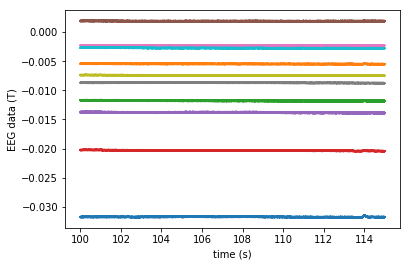

In [5]:
start, stop = eeg.time_as_index([100, 115])
data, times = eeg[:10, start:stop]

import matplotlib.pyplot as plt
import plotly.plotly as py

plt.plot(times, data.T)
plt.xlabel('time (s)')
plt.ylabel('EEG data (T)')


In [6]:
eeg.info

<Info | 17 non-empty fields
    bads : list | 0 items
    ch_names : list | Fp1, Fz, F3, F7, FT9, FC5, FC1, C3, T7, ...
    chs : list | 66 items (EEG: 63, MISC: 2, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    dig : list | 65 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 1350.0 Hz
    meas_date : tuple | 2019-02-27 16:57:14 GMT
    nchan : int | 66
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 5000.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneTyp

In [7]:
event_markers = mne.find_events(eeg)

6943 events found
Event IDs: [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [8]:
event_markers.shape

(6943, 3)

In [9]:
trial_start_inx = event_markers[event_markers[:,2] == 12]
trial_end_inx = event_markers[event_markers[:,2] == 15]

In [11]:
data, times = eeg[:,:]

In [12]:
data.shape

(66, 17770100)

In [13]:
times.shape

(17770100,)

In [34]:
positive = np.ones(100)
neutral = np.zeros(100)
negative = np.zeros(100)-1

In [35]:
labels = np.hstack([positive, neutral, negative])

In [36]:
all_trials=[]
deleted_label_inx = []
for i in range(len(trial_start_inx)):
    eeg_this_trial = data[:, trial_start_inx[i][0]:trial_end_inx[i][0]]
    if eeg_this_trial.shape[1] < 50000: 
        all_trials.append(eeg_this_trial)
    else:
        deleted_label_inx.append(i)

In [37]:
labels = np.delete(labels, deleted_label_inx)

In [38]:
len(labels)

232

In [40]:
len(all_trials)

232

In [45]:
len(all_trials[0])

66

In [44]:
len(all_trials)

232

In [46]:
min_len = 100000
for i in range(len(all_trials)):
    current_len = all_trials[i].shape[1]
    if current_len < min_len:
        min_len = current_len
min_len

40401

In [47]:
equal_len_eeg = []
for i in range(len(all_trials)):
    equal_len_eeg.append(all_trials[i][:, :min_len])

AttributeError: 'list' object has no attribute 'shape'

In [96]:
for i in range(len(all_trials)):
    print(all_trials[i].shape[1])

165195
40438
40441
40406
87150
40433
40440
40404
87560
40407
40411
40441
40437
87665
40406
40407
40407
66831
40407
40411
68778
40440
40432
65866
40439
40404
40405
40411
40402
40443
65545
40406
40411
40403
40407
61692
40407
40407
40407
40408
64309
40435
40407
40411
40403
40407
62560
40407
40407
59123
40407
40406
40407
62248
40407
40407
58845
40408
40407
54921
64950
40406
40406
40407
40407
60303
40407
40407
40407
40407
40406
57977
40407
40407
40406
55061
40407
40406
40407
56310
62320
40406
40407
40407
40406
40407
40406
55026
40407
40407
40407
40406
62873
40407
40407
40407
40407
40407
58224
40403
89578
40403
40406
40407
40481
62414
40443
40401
40441
56727
40407
40407
40407
40407
40407
68289
40407
40407
40407
40407
80643
40407
40401
40407
59712
40406
40407
61765
40403
40407
40408
40407
40406
40407
53503
40401
40407
40407
40406
60615
62822
40403
40407
40407
40407
71692
40406
40407
40407
40407
40407
40407
56310
40407
40407
40407
40407
40406
54504
57317
60877
40406
40407
40407
40407
61102
404

In [89]:
all_trials[1].shape

(66, 40438)

In [91]:
all_trials[2].shape

(66, 40441)

In [92]:
all_trials[3].shape

(66, 40406)

In [93]:
all_trials[4].shape

(66, 87150)

Text(0, 0.5, 'EEG data (T)')

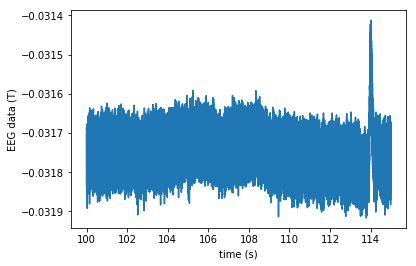

In [10]:
start, stop = eeg.time_as_index([100, 115])
data, times = eeg[:1, start:stop]

import matplotlib.pyplot as plt
import plotly.plotly as py

plt.plot(times, data[0])
plt.xlabel('time (s)')
plt.ylabel('EEG data (T)')